In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm, ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import statsmodels.api as sm
import seaborn as sns
import h5py
import warnings
warnings.filterwarnings('ignore')

fontsize = 14

fig_dir = 'figs/'
kaf_to_gl = 1.23
baseline = 'soln1294'

cmap_vir = cm.get_cmap('viridis')


In [2]:
### get results from WCU reevaluation, after recauculating Pareto set with original 5 objs from MOO
agg_results_wcu = pd.read_csv('../../results_arx/infra_wcu/objs_wcu_pareto_5objs.csv', sep=', ')
### add baseline, Friant16, alt8/3
agg_results_wcu = agg_results_wcu.append(pd.read_csv('../../results_arx/infra_wcu/objs_wcu_pareto_5objs_coarse_withBaselines.csv', sep=', ').iloc[-4:,:])

### map all costs >1000 to 1000 for visual clarity
for c in ['cog_wp_p90','cog_wp_p50','cog_p_p90','cog_p_p50']:
    agg_results_wcu.loc[agg_results_wcu[c] > 1000, c] = 1000
agg_results_wcu['cog_wp'] = agg_results_wcu['cog_wp_p90']

agg_results_wcu.reset_index(inplace=True, drop=True)


In [3]:
# soln = 'soln375'
# agg_results_wcu_soln = agg_results_wcu.loc[agg_results_wcu['label'] == soln]


# #### get annual paymetns for infrastructure
# FKC_participant_payment = 50e6
# CFWB_cost = 50e6
# interest_annual = 0.03
# time_horizon = 30
# cap = 1000
# projects = {0: 'none', 1: 'FKC', 2: 'CFWB', 3: 'FKC_CFWB'}
# principle = {'none': 0., 'FKC': FKC_participant_payment, 'CFWB': CFWB_cost, 'FKC_CFWB': FKC_participant_payment + CFWB_cost}
# payments_per_yr = 1
# interest_rt = interest_annual / payments_per_yr
# num_payments = time_horizon * payments_per_yr
# annual_debt_payment_dict = {k: principle[k] / (((1 + interest_rt) ** num_payments - 1) / (interest_rt * (1 + interest_rt) ** num_payments)) for k in principle}

# project = projects[agg_results_wcu_soln['proj'].iloc[0]]
# annual_debt_payment = annual_debt_payment_dict[project]


In [4]:
# ### parallel axis plot with all except compromise brushed out, & MC distribution shown for compromise.



# ### reorganize for parallel coordinate plot
# curvy = False
# fontsize=12

# cost_type = 'cog_wp'
# color_by = 'n_p'   
# ideal = 'top'
# cols = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
# cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

# ### get MC objectives for different solns, compare across objectives
# with h5py.File('../../results/WCU_results_s2/results.hdf5', 'r') as f:
#     mc_wcu_baseline = f[baseline][...].transpose()

#     ### now get cwg_p
#     dvnames = f[soln].attrs['dv_names'][1:]
#     dvs = f[soln].attrs['dvs'][1:]
#     partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
#     mc_wcu_soln = f[soln][...].transpose()
#     df_mc_wcu_soln = pd.DataFrame(mc_wcu_soln - mc_wcu_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
#     cwg_p_soln = pd.DataFrame(df_mc_wcu_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1) * kaf_to_gl)
#     cwg_p_soln['soln'] = soln
#     cwg_p_soln['obj'] = 'cwg_p'
#     df_overall_wcu = cwg_p_soln
        
            
#     ### now do ap_p
#     dvnames = f[soln].attrs['dv_names'][1:]
#     dvs = f[soln].attrs['dvs'][1:]
#     partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
#     mc_wcu_soln = f[soln][...].transpose()
#     df_mc_wcu_soln = pd.DataFrame(mc_wcu_soln - mc_wcu_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
#     ap_p_soln = pd.DataFrame(-df_mc_wcu_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1) * kaf_to_gl)
#     ap_p_soln['soln'] = soln
#     ap_p_soln['obj'] = 'ap_p'
#     df_overall_wcu = df_overall_wcu.append(ap_p_soln)
        
#     ### now do cwg_np
#     dvnames = f[soln].attrs['dv_names'][1:]
#     dvs = f[soln].attrs['dvs'][1:]
#     partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
#     mc_wcu_soln = f[soln][...].transpose()
#     df_mc_wcu_soln = pd.DataFrame(mc_wcu_soln - mc_wcu_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
#     cwg_np_soln = pd.DataFrame(df_mc_wcu_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1) * kaf_to_gl)
#     cwg_np_soln['soln'] = soln
#     cwg_np_soln['obj'] = 'cwg_np'
#     df_overall_wcu = df_overall_wcu.append(cwg_np_soln)
    
        
#     ### now do cog_wp_p90
#     dvnames = f[soln].attrs['dv_names'][1:]
#     dvs = f[soln].attrs['dvs'][1:]
#     partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
#     cap = 1000
#     project = projects[int(f[soln].attrs['dvs'][0])]
#     annual_debt_payment = annual_debt_payment_dict[project]
#     partner_shares = [dvs[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     for i,d in enumerate(partners):
#         df_mc_wcu_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_wcu_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
#         df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] > cap] = cap
#         df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] < 0] = cap
#     cog_wp_soln = pd.DataFrame(df_mc_wcu_soln[[d + '_cog' for d in partners]].max(axis=1))
#     cog_wp_soln['soln'] = soln
#     cog_wp_soln['obj'] = 'cog_wp'
#     df_overall_wcu = df_overall_wcu.append(cog_wp_soln)
    
#     ### now do n_p
#     dvnames = f[soln].attrs['dv_names'][1:]
#     dvs = f[soln].attrs['dvs'][1:]
#     partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
#     n_p_soln = cog_wp_soln
#     n_p_soln[0] = len(partners)
#     n_p_soln['obj'] = 'n_p'
#     n_p_soln['soln'] = soln
#     df_overall_wcu = df_overall_wcu.append(n_p_soln)
        
# ### rescale so y height is common
# df_overall_wcu.columns = ['value', 'soln', 'obj']
# df_overall_wcu['value_scaled'] = df_overall_wcu['value'].copy()

# objs = ['n_p','cwg_p','ap_p','cwg_np','cog_wp']
# objmins = [2, 37, -3, -60, 78]
# objmaxs = [24, 135, 100, 35, 1000]

# for o,obj in enumerate(objs):
#     if obj not in ['cog_wp']:
#         df_overall_wcu['value_scaled'].loc[df_overall_wcu['obj'] == obj] = (df_overall_wcu['value_scaled'].loc[df_overall_wcu['obj'] == obj] - objmins[o]) / (objmaxs[o] - objmins[o])
#     else:
#         df_overall_wcu['value_scaled'].loc[df_overall_wcu['obj'] == obj] = (objmaxs[o] - df_overall_wcu['value_scaled'].loc[df_overall_wcu['obj'] == obj]) / (objmaxs[o] - objmins[o])
#         objmins[o], objmaxs[o] = objmaxs[o], objmins[o]

In [5]:
# ### now rescale overall aggregated pareto set objectives in same way
# ressat_wcu = agg_results_wcu.loc[:,cols]

# ideal = 'top'


# if ideal == 'bottom':
#     tops = np.array(objmins)
#     bottoms = np.array(objmaxs)
#     ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
#     ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
# elif ideal == 'top':
#     tops = np.array(objmaxs)
#     bottoms = np.array(objmins)
#     ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
#     ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
# else:
#     print('ideal should be "top" or "bottom" based on direction of preference')


# ### parallel coord plot
# fig,ax = plt.subplots(1,1,figsize=(11,4), gridspec_kw={'hspace':0.1, 'wspace':0.1})

# def get_color(color_by, agg_results_wcu, row, cmap):
#     start_num = 2 if color_by == 'n_p' else 1
#     numnorm = (agg_results_wcu[color_by].iloc[row]-start_num) / (agg_results_wcu[color_by].max()-start_num)
#     return cmap(numnorm), numnorm

# cmap_vir = cm.get_cmap('viridis')

# ### plot all solns, brushed
# for i in range(ressat_wcu.shape[0]):
#     for j in range(len(cols)-1):
#         c = '0.8'
#         zorder = 1
#         y1 = ressat_wcu.iloc[i, j]
#         y2 = ressat_wcu.iloc[i, j+1]
#         if curvy:
#             ### add sin shape to help distinguish lines
#             t = np.arange(-np.pi/2, np.pi/2+0.001, 0.01)
#             y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
#             x = j + t / np.pi + 1/2
#         else:
#             y = [y1, y2]
#             x = [j, j+1]
#         alpha = 0.4
#         if i < ressat_wcu.shape[0] - 3:
#             ### plot solns from MOO/WCU
#             ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)

    
# ### highlight compromise soln
# for soln in ['soln375']:
#     ressat_wcu_soln = ressat_wcu.loc[agg_results_wcu['label'] == soln,:]
#     i = ressat_wcu_soln.index[0]
#     xx = []
#     yy = []
#     for j in range(len(cols)-1):
#         c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)
#         y1 = ressat_wcu_soln.iloc[0,j]
#         y2 = ressat_wcu_soln.iloc[0,j+1]
#         if curvy:
#             ### add sin shape to help distinguish lines
#             t = np.arange(-np.pi/2, np.pi/2+0.001, np.pi/10)
#             y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
#             x = j + t / np.pi + 1/2
#         else:
#             x = np.arange(j, j+1+0.001, 1/10)
#             y = y1 + (x - j) * (y2 - y1)
#             xx += list(x)
#             yy += list(y)
#     alpha=1
#     ax.plot(xx, yy, c='k', alpha=alpha, zorder=4, lw=3)
#     ax.plot(xx, yy, c=c, alpha=alpha, zorder=4, lw=2)


# ### add top/bottom ranges
# for j in range(len(cols)):
#     ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
#     if j == len(cols)-1:
#         ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
#     else:
#         ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
        
#     ax.plot([j,j], [0,1], c='k', zorder=2)
# ax.set_xticks([])
# ax.set_yticks([])
# for spine in ['top','bottom','left','right']:
#     ax.spines[spine].set_visible(False)

# if ideal == 'top':
#     ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
# elif ideal == 'bottom':
#     ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    
# ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
# ax.set_ylim(-0.4,1.1)
# labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
#           'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
# for i,l in enumerate(labels):
#     ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
# ax.patch.set_alpha(0)



# for o, obj in enumerate(objs[1:]):
#     data = df_overall_wcu['value_scaled'].loc[np.logical_and(df_overall_wcu['obj'] == obj, df_overall_wcu['soln'] == soln)]
#     kde = sm.nonparametric.KDEUnivariate(data)
#     kde.fit(kernel='tri', fft=False, bw=0.05)
#     y = np.arange(0,1, 0.01 )
#     x = []
#     for yy in y:
#         xx = kde.evaluate(yy) * 0.1
#         if np.isnan(xx):
#             x.append(0.)
#         else:
#             x.append(xx[0])
#     x = np.array(x)
#     color = c
#     ax.fill_betweenx(y, x + o+1, o+1, where=(x > 0.00005), lw=1, alpha=0.6, zorder=3, fc = color, ec = 'k')


# # plt.savefig(f'{fig_dir}paraxis_pdfs_compromise.png', bbox_inches='tight', dpi=300)

### update for DU reanalysis

In [3]:
#### get annual paymetns for infrastructure
FKC_participant_payment = 50e6
CFWB_cost = 50e6
interest_annual = 0.03
time_horizon = 30
cap = 1000
projects = {0: 'none', 1: 'FKC', 2: 'CFWB', 3: 'FKC_CFWB'}
principle = {'none': 0., 'FKC': FKC_participant_payment, 'CFWB': CFWB_cost, 'FKC_CFWB': FKC_participant_payment + CFWB_cost}
payments_per_yr = 1
interest_rt = interest_annual / payments_per_yr
num_payments = time_horizon * payments_per_yr
annual_debt_payment_dict = {k: principle[k] / (((1 + interest_rt) ** num_payments - 1) / (interest_rt * (1 + interest_rt) ** num_payments)) for k in principle}


In [4]:
### get all MC results for particular soln in alternative WCU SOW, relative to baseline.
def get_color(color_by, agg_results_wcu, row, cmap):
    start_num = 2 if color_by == 'n_p' else 1
    numnorm = (agg_results_wcu[color_by].iloc[row]-start_num) / (agg_results_wcu[color_by].max()-start_num)
    return cmap(numnorm), numnorm


def get_wcu_mc_results_soln(soln, baseline):

    with h5py.File('../../results/WCU_results_s2/results.hdf5', 'r') as f:
        dvnames = f[soln].attrs['dv_names']
        dvs = f[soln].attrs['dvs']
        partners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        n_p_soln = len(partners)
        nonpartners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) == 0]
        project = dvs[0]
        annual_debt_payment = annual_debt_payment_dict[projects[int(project+1e-10)]]
        partner_shares = [dvs[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        
        fsoln = f[soln]
        fbaseline = f[baseline]
        
        mc_wcu_baseline = fbaseline[...].transpose()

        ### get cwg_p
        mc_wcu_soln = fsoln[...].transpose()
        df_mc_wcu_soln = pd.DataFrame(mc_wcu_soln - mc_wcu_baseline, index = ['mc' + mc for mc in fsoln.attrs['colnames']], columns = fsoln.attrs['rownames'])
        cwg_p_soln = df_mc_wcu_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1).values * kaf_to_gl

        ### now do ap_p
        ap_p_soln = -df_mc_wcu_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1) * kaf_to_gl

        ### now do cwg_np
        cwg_np_soln = df_mc_wcu_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1) * kaf_to_gl

        ### now do cog_wp_p90
        cap = 1000
        for i,d in enumerate(partners):
            df_mc_wcu_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_wcu_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
            df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] > cap] = cap
            df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] < 0] = cap
        cog_wp_soln = df_mc_wcu_soln[[d + '_cog' for d in partners]].max(axis=1)

        df_overall_wcu = pd.DataFrame({'cwg_p': cwg_p_soln,
                                       'ap_p': ap_p_soln,
                                       'cwg_np': cwg_np_soln,
                                       'cog_wp': cog_wp_soln,
                                       'n_p': n_p_soln,
                                       'mc': [int(mc.split('mc')[1]) for mc in df_mc_wcu_soln.index]})
           
    df_overall_wcu.sort_values(['mc'], inplace=True)
    df_overall_wcu.reset_index(inplace=True, drop=True)

    return df_overall_wcu



def get_du_mc_results_soln(soln, baseline):
    count = 0
    with h5py.File('../../results/DU_results_s2/results.hdf5', 'r') as f:
        dvnames = f[soln]['du_1']['du0'].attrs['dvnames']
        dvs = f[soln]['du_1']['du0'].attrs['dvs']
        partners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        n_p_soln = len(partners)
        nonpartners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) == 0]
        project = dvs[0]
        annual_debt_payment = annual_debt_payment_dict[projects[int(project+1e-10)]]
        partner_shares = [dvs[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        for sample_set, du_adder in zip(('du_1','du_2'), (0, 1152)):
            fsoln = f[soln][sample_set]
            fbaseline = f[baseline][sample_set]
            for du in list(fsoln.keys()):
                du_total = int(du.split('du')[1]) + du_adder
                mc_du_baseline = fbaseline[du][...].transpose()

                ### get cwg_p
                mc_du_soln = fsoln[du][...].transpose()
                df_mc_du_soln = pd.DataFrame(mc_du_soln - mc_du_baseline, index = ['mc' + mc for mc in fsoln[du].attrs['colnames']], columns = fsoln[du].attrs['rownames'])
                cwg_p_soln = df_mc_du_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1).values * kaf_to_gl

                ### now do ap_p
                ap_p_soln = -df_mc_du_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1) * kaf_to_gl

                ### now do cwg_np
                cwg_np_soln = df_mc_du_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1) * kaf_to_gl

                ### now do cog_wp_p90
                cap = 1000
                for i,d in enumerate(partners):
                    df_mc_du_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_du_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
                    df_mc_du_soln[f'{d}_cog'].loc[df_mc_du_soln[f'{d}_cog'] > cap] = cap
                    df_mc_du_soln[f'{d}_cog'].loc[df_mc_du_soln[f'{d}_cog'] < 0] = cap
                cog_wp_soln = df_mc_du_soln[[d + '_cog' for d in partners]].max(axis=1)

                if count == 0:
                    df_overall_du = pd.DataFrame({'cwg_p': cwg_p_soln,
                                               'ap_p': ap_p_soln,
                                               'cwg_np': cwg_np_soln,
                                               'cog_wp': cog_wp_soln,
                                               'n_p': n_p_soln,
                                               'mc': [int(mc.split('mc')[1]) for mc in df_mc_du_soln.index],
                                               'du': du_total})
                    count = 1
                else:
                    df_overall_du = df_overall_du.append(pd.DataFrame({'cwg_p': cwg_p_soln,
                                                               'ap_p': ap_p_soln,
                                                               'cwg_np': cwg_np_soln,
                                                               'cog_wp': cog_wp_soln,
                                                                'n_p': n_p_soln,
                                                               'mc': [int(mc.split('mc')[1]) for mc in df_mc_du_soln.index],
                                                               'du': du_total}))
    df_overall_du.sort_values(['du','mc'], inplace=True)
    df_overall_du.reset_index(inplace=True, drop=True)

    return df_overall_du


In [19]:
from matplotlib.colors import LinearSegmentedColormap, rgb2hex, Normalize
colors_brewer = {'soln375': '#1b9e77', 'friant16': '#d95f02', 'other': '#7570b3'}
cmaps_brewer = {k:LinearSegmentedColormap.from_list("a", ['w',colors_brewer[k]]) for k in soln_objs}
cmaps_brewer = {k:LinearSegmentedColormap.from_list("a", [(0, cmaps_brewer[k](0.15)), (0.3, colors_brewer[k]), (1, colors_brewer[k])]) for k in soln_objs}


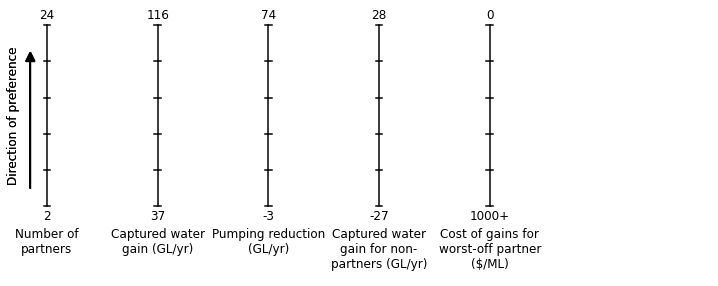

In [20]:
### parallel axis plot with WCU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})


### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, 37, -3, -27, 0]
objmaxs = [24, 116, 74, 28, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')




### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)

### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)


plt.xlim([-0.3,6])


plt.savefig(f'{fig_dir}paraxis0.png', bbox_inches='tight', dpi=300, transparent=True)


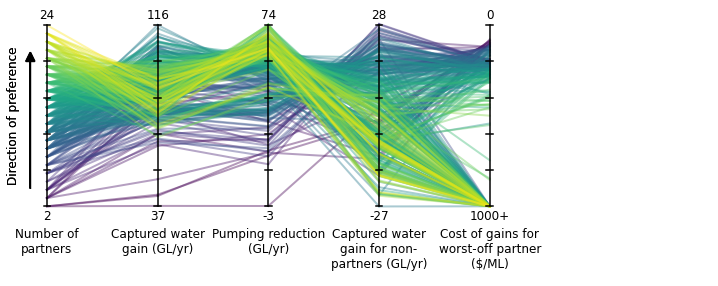

In [21]:
### parallel axis plot with WCU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})


### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, 37, -3, -27, 0]
objmaxs = [24, 116, 74, 28, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')


### plot objs for all partnerships after WCU, brushed. omit baseline & friant/alts
for i in range(ressat_wcu.shape[0]-4):
    for j in range(len(objs)-1):
        c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)        
        zorder = numnorm
        y1 = ressat_wcu.iloc[i, j]
        y2 = ressat_wcu.iloc[i, j+1]
        y = [y1, y2]
        x = [j, j+1]
        alpha = 0.4
        ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=2)


### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)


### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

plt.xlim([-0.3,6])

plt.savefig(f'{fig_dir}paraxis1.png', bbox_inches='tight', dpi=300, transparent=True)


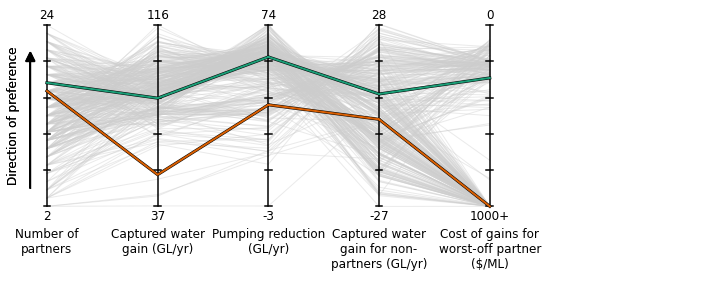

In [22]:
### parallel axis plot with WCU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})


### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, 37, -3, -27, 0]
objmaxs = [24, 116, 74, 28, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')


### plot objs for all partnerships after WCU, brushed. omit baseline & friant/alts
for i in range(ressat_wcu.shape[0]-4):
    for j in range(len(objs)-1):
        c = '0.8'
        zorder = 1
        y1 = ressat_wcu.iloc[i, j]
        y2 = ressat_wcu.iloc[i, j+1]
        y = [y1, y2]
        x = [j, j+1]
        alpha = 0.4
        ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)


### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)


### now add detail for particular soln
for sidx, soln_obj in enumerate(['soln375','friant16']):

    ### highlight soln, wcu agg objectives
    ressat_wcu_soln = ressat_wcu.loc[agg_results_wcu['label'] == soln_obj,:]
    i = ressat_wcu_soln.index[0]
    xx = []
    yy = []
    for j in range(len(objs)-1):
#         c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)
        c = colors_brewer[soln_obj]
        y1 = ressat_wcu_soln.iloc[0,j]
        y2 = ressat_wcu_soln.iloc[0,j+1]
        x = np.arange(j, j+1+0.001, 1/10)
        y = y1 + (x - j) * (y2 - y1)
        xx += list(x)
        yy += list(y)
    alpha=1
    ax.plot(xx, yy, c='k', alpha=alpha, zorder=5, lw=3)
    ax.plot(xx, yy, c=c, alpha=alpha, zorder=5, lw=2)
    
    ### get MC data for WCU & DU
    df_overall_wcu = get_wcu_mc_results_soln(soln_obj_wcu_mc_dict[soln_obj], soln_obj_wcu_mc_dict['baseline'])
    
    for o,obj in enumerate(objs):
        df_overall_wcu[f'{obj}_scaled'] = df_overall_wcu[obj].copy()
        if obj not in ['cog_wp']:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
        else:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])


### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

plt.xlim([-0.3,6])

plt.savefig(f'{fig_dir}paraxis2.png', bbox_inches='tight', dpi=300, transparent=True)


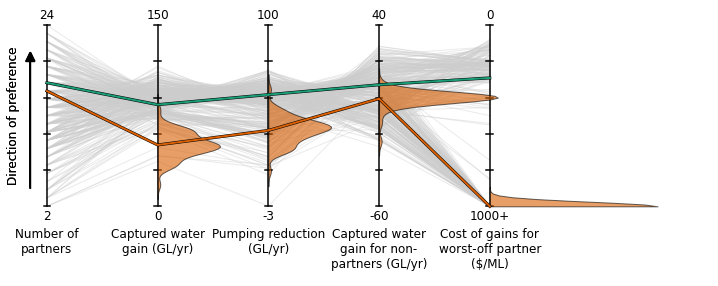

In [23]:
### parallel axis plot with WCU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})


### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, 0, -3, -60, 0]
objmaxs = [24, 150, 100, 40, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')


### plot objs for all partnerships after WCU, brushed. omit baseline & friant/alts
for i in range(ressat_wcu.shape[0]-4):
    for j in range(len(objs)-1):
        c = '0.8'
        zorder = 1
        y1 = ressat_wcu.iloc[i, j]
        y2 = ressat_wcu.iloc[i, j+1]
        y = [y1, y2]
        x = [j, j+1]
        alpha = 0.4
        ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)


### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)


### now add detail for particular soln
for sidx, soln_obj in enumerate(['soln375','friant16']):

    ### highlight soln, wcu agg objectives
    ressat_wcu_soln = ressat_wcu.loc[agg_results_wcu['label'] == soln_obj,:]
    i = ressat_wcu_soln.index[0]
    xx = []
    yy = []
    for j in range(len(objs)-1):
#         c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)
        c = colors_brewer[soln_obj]
        y1 = ressat_wcu_soln.iloc[0,j]
        y2 = ressat_wcu_soln.iloc[0,j+1]
        x = np.arange(j, j+1+0.001, 1/10)
        y = y1 + (x - j) * (y2 - y1)
        xx += list(x)
        yy += list(y)
    alpha=1
    ax.plot(xx, yy, c='k', alpha=alpha, zorder=5, lw=3)
    ax.plot(xx, yy, c=c, alpha=alpha, zorder=5, lw=2)
    
    ### get MC data for WCU & DU
    df_overall_wcu = get_wcu_mc_results_soln(soln_obj_wcu_mc_dict[soln_obj], soln_obj_wcu_mc_dict['baseline'])
    
    for o,obj in enumerate(objs):
        df_overall_wcu[f'{obj}_scaled'] = df_overall_wcu[obj].copy()
        if obj not in ['cog_wp']:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
        else:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])

                
    if soln_obj == 'friant16':
        ### add wcu dist
        for o, obj in enumerate(objs[1:]):
            data = df_overall_wcu[f'{obj}_scaled']
            kde = sm.nonparametric.KDEUnivariate(data)
            kde.fit(bw=0.025)
    #         kde.fit(kernel='tri', fft=False, bw=0.05)

            y = np.arange(0,1, 0.01 )
            x = []
            for yy in y:
                xx = kde.evaluate(yy) * 0.095
                if np.isnan(xx):
                    x.append(0.)
                else:
                    x.append(xx[0])
            x = np.array(x)
            ax.fill_betweenx(y, x + o+1, o+1, where=(x > 0.00005), lw=1, alpha=0.6, zorder=4, fc = c, ec = 'k')




### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

plt.xlim([-0.3,6])

plt.savefig(f'{fig_dir}paraxis3.png', bbox_inches='tight', dpi=300, transparent=True)


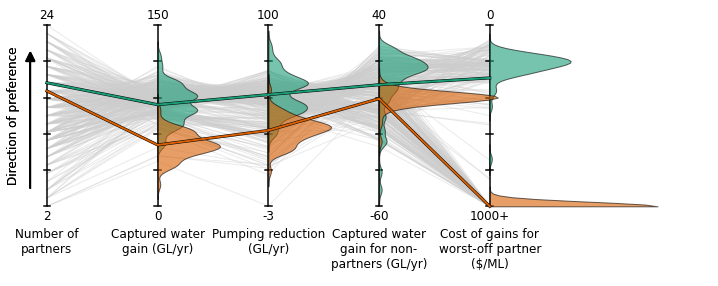

In [24]:
### parallel axis plot with WCU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})


### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, 0, -3, -60, 0]
objmaxs = [24, 150, 100, 40, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')


### plot objs for all partnerships after WCU, brushed. omit baseline & friant/alts
for i in range(ressat_wcu.shape[0]-4):
    for j in range(len(objs)-1):
        c = '0.8'
        zorder = 1
        y1 = ressat_wcu.iloc[i, j]
        y2 = ressat_wcu.iloc[i, j+1]
        y = [y1, y2]
        x = [j, j+1]
        alpha = 0.4
        ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)


### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)


### now add detail for particular soln
for sidx, soln_obj in enumerate(['soln375','friant16']):

    ### highlight soln, wcu agg objectives
    ressat_wcu_soln = ressat_wcu.loc[agg_results_wcu['label'] == soln_obj,:]
    i = ressat_wcu_soln.index[0]
    xx = []
    yy = []
    for j in range(len(objs)-1):
#         c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)
        c = colors_brewer[soln_obj]
        y1 = ressat_wcu_soln.iloc[0,j]
        y2 = ressat_wcu_soln.iloc[0,j+1]
        x = np.arange(j, j+1+0.001, 1/10)
        y = y1 + (x - j) * (y2 - y1)
        xx += list(x)
        yy += list(y)
    alpha=1
    ax.plot(xx, yy, c='k', alpha=alpha, zorder=5, lw=3)
    ax.plot(xx, yy, c=c, alpha=alpha, zorder=5, lw=2)
    
    ### get MC data for WCU & DU
    df_overall_wcu = get_wcu_mc_results_soln(soln_obj_wcu_mc_dict[soln_obj], soln_obj_wcu_mc_dict['baseline'])
    
    for o,obj in enumerate(objs):
        df_overall_wcu[f'{obj}_scaled'] = df_overall_wcu[obj].copy()
        if obj not in ['cog_wp']:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
        else:
            if ideal == 'bottom':
                df_overall_wcu[f'{obj}_scaled'] = (df_overall_wcu[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
            elif ideal == 'top':
                df_overall_wcu[f'{obj}_scaled'] = (bottoms[o] - df_overall_wcu[f'{obj}_scaled']) / (bottoms[o] - tops[o])


    ### add wcu dist
    for o, obj in enumerate(objs[1:]):
        data = df_overall_wcu[f'{obj}_scaled']
        kde = sm.nonparametric.KDEUnivariate(data)
        kde.fit(bw=0.025)
#         kde.fit(kernel='tri', fft=False, bw=0.05)

        y = np.arange(0,1, 0.01 )
        x = []
        for yy in y:
            xx = kde.evaluate(yy) * 0.095
            if np.isnan(xx):
                x.append(0.)
            else:
                x.append(xx[0])
        x = np.array(x)
        ax.fill_betweenx(y, x + o+1, o+1, where=(x > 0.00005), lw=1, alpha=0.6, zorder=4, fc = c, ec = 'k')




### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

plt.xlim([-0.3,6])

plt.savefig(f'{fig_dir}paraxis4.png', bbox_inches='tight', dpi=300, transparent=True)


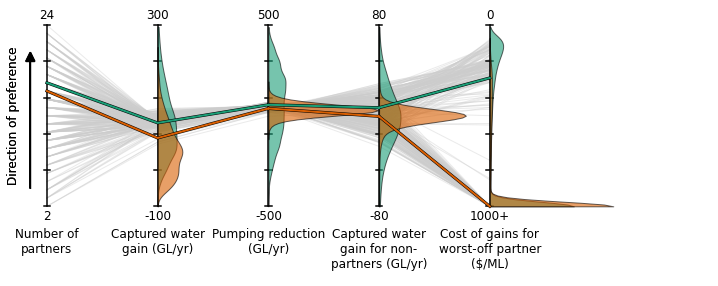

In [25]:
### parallel axis plot with DU MC distributions for Compromise vs Friant16

fontsize=12
cost_type = 'cog_wp'
color_by = 'n_p'   
ideal = 'top'
objs = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
cost_type_labels = {'cog_wp': 'Cost of gains for\nworst-off partner\n($/ML)'}

### now add addl detail for selected solns
soln_obj_wcu_mc_dict = {'soln375': 'soln375', 'friant16': 'soln1293', 'baseline': 'soln1294'}
soln_obj_du_mc_dict = {'soln375': 'soln50', 'friant16': 'soln96', 'baseline': 'soln95'}


### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(12.5,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})



### rescale objectives so that parallel axes span 0-1. Note last axis for cog_wp is inverted.
objmins = [2, -100, -500, -80, 0]
objmaxs = [24, 300, 500, 80, 1000]

ressat_wcu = agg_results_wcu.loc[:,objs]

if ideal == 'bottom':
    tops = np.array(objmins)
    bottoms = np.array(objmaxs)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, :-1] = (bottoms[:-1] - ressat_wcu.iloc[:, :-1]) / (bottoms[:-1] - tops[:-1])
    ressat_wcu.iloc[:, -1] = (ressat_wcu.iloc[:, -1] - bottoms[-1]) / (tops[-1] - bottoms[-1])
elif ideal == 'top':
    tops = np.array(objmaxs)
    bottoms = np.array(objmins)
    tops[-1], bottoms[-1] = bottoms[-1], tops[-1]
    ressat_wcu.iloc[:, -1] = (bottoms[-1] - ressat_wcu.iloc[:, -1]) / (bottoms[-1] - tops[-1])
    ressat_wcu.iloc[:, :-1] = (ressat_wcu.iloc[:, :-1] - bottoms[:-1]) / (tops[:-1] - bottoms[:-1])
else:
    print('ideal should be "top" or "bottom" based on direction of preference')


### plot objs for all partnerships after WCU, brushed. omit baseline & friant/alts
for i in range(ressat_wcu.shape[0]-4):
    for j in range(len(objs)-1):
        c = '0.8'
        zorder = 1
        y1 = ressat_wcu.iloc[i, j]
        y2 = ressat_wcu.iloc[i, j+1]
        y = [y1, y2]
        x = [j, j+1]
        alpha = 0.4
        ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)


### add top/bottom ranges and ticks at 20% intervals
for j in range(len(objs)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(objs)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    

    ax.plot([j,j], [0,1], c='k', zorder=2)
    for y in np.arange(0,1.001,0.2):
        ax.plot([j-0.03,j+0.03],[y,y], c='k', zorder=2)

### clean up figure
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)

ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

# ax.set_xlim(-0.4, 5)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)


### now add detail for particular soln
for sidx, soln_obj in enumerate(['soln375','friant16']):

    ### highlight soln, wcu agg objectives
    ressat_wcu_soln = ressat_wcu.loc[agg_results_wcu['label'] == soln_obj,:]
    i = ressat_wcu_soln.index[0]
    xx = []
    yy = []
    for j in range(len(objs)-1):
#         c, numnorm = get_color(color_by, agg_results_wcu, i, cmap_vir)
        c = colors_brewer[soln_obj]
        y1 = ressat_wcu_soln.iloc[0,j]
        y2 = ressat_wcu_soln.iloc[0,j+1]
        x = np.arange(j, j+1+0.001, 1/10)
        y = y1 + (x - j) * (y2 - y1)
        xx += list(x)
        yy += list(y)
    alpha=1
    ax.plot(xx, yy, c='k', alpha=alpha, zorder=5, lw=3)
    ax.plot(xx, yy, c=c, alpha=alpha, zorder=5, lw=2)
    
    ### get MC data for DU
    df_overall_du = get_du_mc_results_soln(soln_obj_du_mc_dict[soln_obj], soln_obj_du_mc_dict['baseline'])
    
    for o,obj in enumerate(objs):
        df_overall_du[f'{obj}_scaled'] = df_overall_du[obj].copy()
        if obj not in ['cog_wp']:
            if ideal == 'bottom':
                df_overall_du[f'{obj}_scaled'] = (bottoms[o] - df_overall_du[f'{obj}_scaled']) / (bottoms[o] - tops[o])
            elif ideal == 'top':
                df_overall_du[f'{obj}_scaled'] = (df_overall_du[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
        else:
            if ideal == 'bottom':
                df_overall_du[f'{obj}_scaled'] = (df_overall_du[f'{obj}_scaled'] - bottoms[o]) / (tops[o] - bottoms[o])
            elif ideal == 'top':
                df_overall_du[f'{obj}_scaled'] = (bottoms[o] - df_overall_du[f'{obj}_scaled']) / (bottoms[o] - tops[o])


    ### add du dist
    for o, obj in enumerate(objs[1:]):
        data = df_overall_du[f'{obj}_scaled']
        kde = sm.nonparametric.KDEUnivariate(data)
        kde.fit(bw=0.025)
#         kde.fit(kernel='tri', fft=False, bw=0.05)

        y = np.arange(0,1, 0.01 )
        x = []
        for yy in y:
            xx = kde.evaluate(yy) * 0.08
            if np.isnan(xx):
                x.append(0.)
            else:
                x.append(xx[0])
        x = np.array(x)
        ax.fill_betweenx(y, x + o+1, o+1, where=(x > 0.00005), lw=1, alpha=0.6, zorder=4, fc = c, ec = 'k')




### add arrow for direction of preference
if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

plt.xlim([-0.3,6])

plt.savefig(f'{fig_dir}paraxis5.png', bbox_inches='tight', dpi=300, transparent=True)


In [26]:
### get all MC results for particular soln in alternative DU & WCU SOW, relative to baseline.


def get_wcu_mc_district_results_soln(soln, baseline):
    count = 0
    with h5py.File('../../results/WCU_results_s2/results.hdf5', 'r') as f:
        dvnames = f[soln].attrs['dv_names']
        dvs = f[soln].attrs['dvs']
        partners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        n_p_soln = len(partners)
        nonpartners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) == 0]
        project = dvs[0]
        annual_debt_payment = annual_debt_payment_dict[projects[int(project+1e-10)]]
        partner_shares = [dvs[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        
        fsoln = f[soln]
        fbaseline = f[baseline]
        
        mc_wcu_baseline = fbaseline[...].transpose()

        ### get cwg_p
        mc_wcu_soln = fsoln[...].transpose()
        df_mc_wcu_soln = pd.DataFrame(mc_wcu_soln - mc_wcu_baseline, index = ['mc' + mc for mc in fsoln.attrs['colnames']], columns = fsoln.attrs['rownames'])
        for d in partners:
            if count == 0:
                df_overall_wcu = df_mc_wcu_soln[[d + '_avg_captured_water']] * kaf_to_gl
                df_overall_wcu.columns = [d+'_cwg']
                count = 1
            else:
                df_overall_wcu[d + '_cwg'] = df_mc_wcu_soln[d + '_avg_captured_water'] * kaf_to_gl
        df_overall_wcu['overall_cwg_p'] = df_mc_wcu_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1).values * kaf_to_gl
                

        ### now do ap_p
        for d in partners:
            df_overall_wcu[d + '_ap'] = -df_mc_wcu_soln[d + '_avg_pumping'] * kaf_to_gl
        df_overall_wcu['overall_ap_p'] = df_mc_wcu_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1).values * kaf_to_gl

        ### now do cwg_np
        for d in nonpartners:
            df_overall_wcu[d+'_cwg'] = df_mc_wcu_soln[d + '_avg_captured_water'] * kaf_to_gl
        df_overall_wcu['overall_cwg_np'] = df_mc_wcu_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1).values * kaf_to_gl

        ### now do cog_wp_p90
        cap = 1000
        for i,d in enumerate(partners):
            df_mc_wcu_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_wcu_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
            df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] > cap] = cap
            df_mc_wcu_soln[f'{d}_cog'].loc[df_mc_wcu_soln[f'{d}_cog'] < 0] = cap
            df_overall_wcu[d + '_cog'] = df_mc_wcu_soln[d + '_cog']
        df_overall_wcu['overall_cog_wp'] = df_mc_wcu_soln[[d + '_cog' for d in partners]].max(axis=1)

    order = np.argsort(partner_shares)[::-1]
    partner_shares = [partner_shares[o] for o in order]
    partners = [partners[o] for o in order]

    return df_overall_wcu, partners, nonpartners, partner_shares



def get_du_mc_district_results_soln(soln, baseline):
    count_outer = 0
    with h5py.File('../../results/DU_results_s2/results.hdf5', 'r') as f:
        dvnames = f[soln]['du_1']['du0'].attrs['dvnames']
        dvs = f[soln]['du_1']['du0'].attrs['dvs']
        partners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        n_p_soln = len(partners)
        nonpartners = [dvnames[i] for i in range(1, len(dvs)) if (dvs[i]) == 0]
        project = dvs[0]
        annual_debt_payment = annual_debt_payment_dict[projects[int(project+1e-10)]]
        partner_shares = [dvs[i] for i in range(1, len(dvs)) if (dvs[i]) > 0]
        
        for sample_set, du_adder in zip(('du_1','du_2'), (0, 1152)):
            fsoln = f[soln][sample_set]
            fbaseline = f[baseline][sample_set]
            for du in list(fsoln.keys()):
                count_inner = 0
                du_total = int(du.split('du')[1]) + du_adder
                mc_du_baseline = fbaseline[du][...].transpose()
                
                mc_du_soln = fsoln[du][...].transpose()
                df_mc_du_soln = pd.DataFrame(mc_du_soln - mc_du_baseline, index = ['mc' + mc for mc in fsoln[du].attrs['colnames']], columns = fsoln[du].attrs['rownames'])

                ### get cwg_p
                for d in partners:
                    if count_inner == 0:
                        df_du = df_mc_du_soln[[d + '_avg_captured_water']] * kaf_to_gl
                        df_du.columns = [d+'_cwg']
                        count_inner = 1
                    else:
                        df_du[d + '_cwg'] = df_mc_du_soln[d + '_avg_captured_water'] * kaf_to_gl
                df_du['overall_cwg_p'] = df_mc_du_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1).values * kaf_to_gl


                ### now do ap_p
                for d in partners:
                    df_du[d + '_ap'] = -df_mc_du_soln[d + '_avg_pumping'] * kaf_to_gl
                df_du['overall_ap_p'] = df_mc_du_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1).values * kaf_to_gl

                ### now do cwg_np
                for d in nonpartners:
                    df_du[d+'_cwg'] = df_mc_du_soln[d + '_avg_captured_water'] * kaf_to_gl
                df_du['overall_cwg_np'] = df_mc_du_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1).values * kaf_to_gl

                ### now do cog_wp_p90
                cap = 1000
                for i,d in enumerate(partners):
                    df_mc_du_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_du_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
                    df_mc_du_soln[f'{d}_cog'].loc[df_mc_du_soln[f'{d}_cog'] > cap] = cap
                    df_mc_du_soln[f'{d}_cog'].loc[df_mc_du_soln[f'{d}_cog'] < 0] = cap
                    df_du[d + '_cog'] = df_mc_du_soln[d + '_cog']
                df_du['overall_cog_wp'] = df_mc_du_soln[[d + '_cog' for d in partners]].max(axis=1)
                
                df_du['du'] = du
                df_du['mc'] = [int(mc.split('mc')[1]) for mc in df_mc_du_soln.index]
                if count_outer == 0:
                    df_overall_du = df_du.copy()
                    count_outer = 1
                else:
                    df_overall_du = df_overall_du.append(df_du)
    
    df_overall_du.sort_values(['du','mc'], inplace=True)
    df_overall_du.reset_index(inplace=True, drop=True)
    
    order = np.argsort(partner_shares)[::-1]
    partner_shares = [partner_shares[o] for o in order]
    partners = [partners[o] for o in order]

    return df_overall_du, partners, nonpartners, partner_shares


### Maps

In [27]:
import geopandas as gpd
import contextily as cx
from generativepy.color import Color
from PIL import ImageColor
from matplotlib.colors import rgb2hex


#local data folder name
geo_dir = '../paper1/maps/ca_geo'
projection_string = 'EPSG:4326'#project raster to data projection
projection_num = 4326
point_location_filename = geo_dir + '/CALFEWS_RESERVOIRS.csv'#coordinates of map 'points'
shapefile_folder = geo_dir + '/CALFEWS_shapes/'
districts_folder = geo_dir + '/CALFEWS_shapes/Water_Districts/'
canal_folder = geo_dir + '/CALFEWS_shapes/Canals_and_Aqueducts_local/'
raster_folder = geo_dir + '/ca_satellite/'
outline_name = geo_dir + '/CALFEWS_shapes/states.shp'#state outline
id4_name = geo_dir + '/ZOB7_ID4_WGS1984/ZOB7_WGS1984.shp'

In [28]:
ag_keys = {
           'BDM': ['berrendamesawaterdistrict'], 'BLR': ['belridgewaterstoragedistrict'], 'BVA': ['buenavistawaterstoragedistrict'], 
           'CWO': ['cawelowaterdistrict'], 'HML': ['henrymillerwaterdistrict'], 'KND': ['kerndeltawaterdistrict'], 'LHL': ['losthillswaterdistrict'],
           'RRB': ['rosedale-riobravowaterstoragedistrict'], 'SMI': ['semitropicwaterservicedistrict'], 'THC': ['tehachapi-cummingscountywaterdistrict'], 
           'TJC': ['tejon-castacwaterdistrict'], 'WKN': ['westkernwaterdistrict'], 'WRM': ['wheelerridge-maricopawaterstoragedistrict'],
           'COB': ['bakersfieldcityof'], 'NKN': ['northkernwaterstoragedistrict'], 'ARV': ['arvin-edisonwaterstoragedistrict'],
           'PIX': ['pixleyirrigationdistrict'], 'DLE': ['delano-earlimartirrigationdistrict'], 'EXE': ['exeterirrigationdistrict'],
           'KRT': ['kern-tulare'], 'LND': ['lindmore'], 'LDS': ['lindsay-strathmoreirrigationdistric'],
           'LWT': ['lowertule'], 'PRT': ['portervilleirrigationdistrict'], 'SAU': ['saucelito'], 'SFW': ['shafter-wascoirrigationdistrict'],
           'SSJ': ['southernsanjoaquinmunicipalutilitydistrict'], 'TPD': ['teapot'], 'TBA': ['terrabellairrigationdistrict'], 'TUL': ['tulareirrigationdistrict'],
           'COF': ['fresnocityof'], 'FRS': ['fresnoirrigation'], 
           'DLR': ['dudleyridge'], 'TLB': ['tularelake'], 'KWD': ['kaweahdelta'], 'WSL': ['westlands'], 'SNL': ['sanluiswater'], 
           'PNC': ['panoche'], 'DLP': ['delpuerto'], 'CWC': ['chowchillawaterdistrict'], 'MAD': ['maderairrigationdistrict'], 
           'CNS': ['consolidated'], 'ALT': ['altairrigationdistrict'],  
           'KWB': ['kernwaterbank'],
         
          # 'OFK': ['hillsvalley', 'orangecoveirrigationdistrict','lewiscreek','lindsaycityof','stonecorral' ,
           #        'ivanhoeirrigationdistrict', 'orangecovecityof', 'tri-valleywaterdistrict', 'internationalwaterdistrict', 
            #       'garfield', 'hiddenlakes', 'fresnocountywaterworksdistrictno18'], #'gravely'
           'KRWA': ['kingsriverwaterdistrict'],#, 'kingsriverconservationdistrict'],
           #'OEX': ['sanluiscanalcompany', 'centralcalifornia', 'firebaughcanalcompany', 'columbiacanalcompany'],
           #'OCD': ['bantacarbonairrigationdistrict, byronbethanyirrigationdistrict', 'eaglefield', 'mercysprings',
            #       'oralomawaterdistrict', 'pajarovalleywatermanagementagency', 'pattersonwaterdistrict', 'westsidewaterdistrict',
             #      'weststanislaus', 'coelho','fresnoslough', 'jamesirrigationdistrict', 'lagunawaterdistrict',
              #     '1606', 'tranquilityirrigationdistrict', 'avenal', 'coalingacityof', 'huroncityof', 'pacheco', 
               #    'tranquilitypublicutilitydistrict']#, 'tracycityof'
          }

#                   'OXV': ['hillsvalley', 'tri-valleywaterdistrict']
#,                  'KCWA': 'kerncountywateragency', }
#                   'ID4': '4', 
#                   'OKW': 'otherkaweah',
            #       'OTL': 'othertule', 
#                  'OSW': 'otherswp', 

#                  'SOC': 'socal', 'SOB': 'southbay', 'CCA': 'centralcoast', 
          
    
districts_MOO = ["FRS","COF","TUL","KWD","EXE","LDS", "LND","PRT","LWT","TPD","SAU","TBA","PIX","DLE","KRT","SSJ", 
                 "SFW","NKN","ARV", "DLR","SMI","TJC","BLR","LHL","BDM","WRM","COB","BVA","CWO","HML",
                        "KND","RRB","CNS","ALT","CWC","MAD"] #"ID4","SOC","SOB","CCA"
ag_keys = {k: ag_keys[k] for k in districts_MOO}

def district_match(shp_names, name):
    shp_names_lc = [k.lower().strip().replace(' ','') for k in shp_names]
    is_match = [name in k for k in shp_names_lc]
    return [i for i in range(len(is_match)) if is_match[i]], [shp_names_lc[i] for i in range(len(is_match)) if is_match[i]]

### read in shapefile of all water districts
ags = gpd.read_file(districts_folder + 'Water_Districts.shp')
ags = ags.to_crs(crs=26944)  ### California Zone 4 NAD83 projection

ags.sort_values('AGENCYNAME', inplace=True)

### filter to only keep districts in study area
idxs = []
names = []
keys = []
for k,vs in ag_keys.items():
    for v in vs:
        idx, name = district_match(ags.AGENCYNAME, v)
        idxs += idx
        names += name
        for i in range(len(idx)):
            keys.append(k)
            
ags = ags.iloc[idxs,:]
ags.reset_index(drop=True, inplace=True)
ags['area'] = ags.geometry.area
ags['district'] = keys

### get id4 and add to ags
id4 = gpd.read_file(id4_name)
id4 = id4.to_crs(ags.crs)
id4['district'] = 'ID4'

ags = ags.append(id4)
ags

,OBJECTID,AGENCYNAME,SOURCE,AGENCYUNIQ,LASTMODIFI,MODIFIEDBY,SOURCECOMM,Date_Data_,GlobalID,geometry,...,district,OBJECTID_1,WDNAME_1,Shape_Leng,VERSION,Project,KCWA_MU,area_ac,Shape_Le_1,Shape_Area
0,32,Fresno Irrigation District,SCRO,961.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{0EA9AE2A-51F2-4E0B-B3AA-E84D50D0DD42},"MULTIPOLYGON (((1934206.451 672662.007, 193422...",...,FRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,180,Fresno City Of Service area,SCRO,934.0,2016-05-23T14:09:59.000Z,SERYSIAN,None,2013-11-07T00:00:00.000Z,{AA6B6103-329A-4605-A308-E734192C2597},"POLYGON ((1929741.292 673633.250, 1929742.629 ...",...,COF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66,Tulare Irrigation District,SCRO,2518.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{21D33668-AA85-4E44-BBE6-A1F051A1003A},"MULTIPOLYGON (((1966446.075 605033.731, 196661...",...,TUL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,298,Kaweah Delta Water Conservation District,USBR-Federal,1278.0,2010-08-31T00:00:00.000Z,source,None,2010-08-31T00:00:00.000Z,{D6F406C5-16E7-433B-9287-1031BFF9232E},"POLYGON ((1980653.968 617522.656, 1980648.215 ...",...,KWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,Exeter Irrigation District,SCRO,864.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{2F22D595-2D84-4D01-849A-FFCA293922D8},"POLYGON ((1994403.411 614896.984, 1994385.233 ...",...,EXE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75,Lindsay - Strathmore Irrigation District,SCRO,1433.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{2684C64C-8EAA-46A5-851A-4C561C4A3EC2},"MULTIPOLYGON (((1992456.959 596578.363, 199258...",...,LDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,77,Lindmore Irrigation District,SCRO,1431.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{D15D4F24-D4D2-4136-8F8E-B6DF68186085},"MULTIPOLYGON (((1989353.313 600896.419, 198935...",...,LND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,78,Porterville Irrigation District,SCRO,1958.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{40209707-9397-432C-B79D-67B8A8CD2502},"POLYGON ((1995796.228 578061.462, 1995591.805 ...",...,PRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70,Lower Tule River Irrigation District,SCRO,1500.0,2017-01-10T10:03:55.000Z,SERYSIAN,None,2013-11-07T00:00:00.000Z,{C13BDBF9-E8BB-4C8C-9DD5-6D99198A939D},"POLYGON ((1987133.815 586900.607, 1987128.593 ...",...,LWT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79,Tea Pot Dome Water District,SCRO,2450.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{A864C43D-79F2-4462-A1D0-FEAE51E08155},"MULTIPOLYGON (((1997989.927 574435.459, 199799...",...,TPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
### get other shapefiles
from shapely.geometry import Point, Polygon, LineString, MultiLineString

states = gpd.read_file(shapefile_folder + 'states.shp')
states = states.to_crs(ags.crs)

canals = gpd.read_file(shapefile_folder + 'drawings-line.shp')
canals = canals.to_crs(ags.crs)
canals_fkc = canals.loc[canals['Name'] == 'fkc']
canals_other = canals.loc[canals['Name'] != 'fkc']

tlb = gpd.read_file(shapefile_folder + 'Tulare_Basin-line.shp')
tlb = tlb.to_crs(ags.crs)

sjr = gpd.read_file(shapefile_folder + 'San_Joaquin-line.shp')
sjr = sjr.to_crs(ags.crs)

kings = gpd.read_file(shapefile_folder + 'kings_ext.shp')
kings = kings.to_crs(ags.crs)

res = pd.read_csv(point_location_filename)
geometry = [Point(xy) for xy in zip(res['LONG'], res['LAT'])]
res_gdf = gpd.GeoDataFrame(res, crs = 4326, geometry = geometry)
res_gdf = res_gdf.to_crs(ags.crs)
res_gdf = res_gdf.loc[[name in ['MILLERTON','PINE FLAT','KAWEAH','SUCCESS','ISABELLA','SAN LUIS'] for name in res_gdf['NAME']]]
res_gdf

,Unnamed: 0,BASIN,LAT,LONG,NAME,STATION,geometry
7,7,SAN JOAQUIN RIVER,37.0000,-119.7030,MILLERTON,MIL,POINT (1937427.730 685167.275)
8,8,KINGS RIVER,36.8316,-119.3250,PINE FLAT,PFT,POINT (1971009.121 666299.808)
9,9,KAWEAH RIVER,36.4166,-119.0030,KAWEAH,KWH,POINT (1999730.953 620200.583)
10,10,TULE RIVER,36.0583,-118.9180,SUCCESS,TLR,POINT (2007387.898 580446.926)
11,11,KERN RIVER,35.6466,-118.4789,ISABELLA,ISB,POINT (2047196.834 534889.598)
12,12,CALIFORNIA AQUEDUCT,37.0980,-121.0510,SAN LUIS,SNL,POINT (1817690.109 697760.580)


friant16
['ARV', 'LWT', 'DLE', 'SSJ', 'OFK', 'TUL', 'SFW', 'COF', 'LND', 'SAU', 'TBA', 'LDS', 'PRT', 'FRS', 'EXE', 'TPD']
soln375
['ID4', 'FRS', 'CNS', 'EXE', 'LWT', 'KND', 'KWD', 'KRT', 'LDS', 'SAU', 'TPD', 'PIX', 'PRT', 'SFW', 'ARV', 'TBA', 'SSJ']


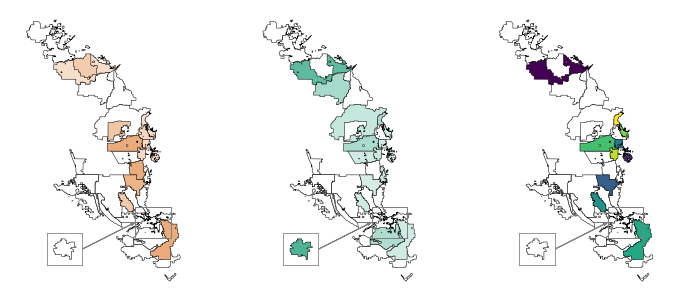

In [42]:
### map different projects & their overlap
alpha = 1
fontsize = 10
nonpartnercolor = 'w'



results_fig = agg_results_wcu   
    
fig, axs = plt.subplots(1,3, figsize=(12,6))#, gridspec_kw={'width_ratios': [0.75,0.25], 'wspace':0.3})

soln_objs = ['soln375','friant16']

dict_df_overall_wcu, dict_partners, dict_nonpartners, dict_shares = {}, {}, {}, {}
for soln_obj in soln_objs:
    dict_df_overall_wcu[soln_obj], dict_partners[soln_obj], dict_nonpartners[soln_obj], dict_shares[soln_obj] = get_wcu_mc_district_results_soln(soln_obj_wcu_mc_dict[soln_obj], soln_obj_wcu_mc_dict['baseline'])

### get overlapping districts included in each
partners_joint = [d for d in dict_partners['soln375'] if d in dict_partners['friant16']]

### reorder based on cog in friant16 minus in compromise
pricediffs = []
for i,d in enumerate(partners_joint):
    c = f'{d}_cog'
    pricediffs.append((dict_df_overall_wcu[soln_objs[1]][c] - dict_df_overall_wcu[soln_objs[0]][c]).mean())
order = np.argsort(pricediffs)[::-1]
partners_joint = [partners_joint[o] for o in order]


other_districts = ['ID4','SOB','SOC','CCC']

for fi,soln_obj in enumerate(soln_objs[::-1]):
    ax = axs[fi]
    partners = dict_partners[soln_obj]
    print(soln_obj)
    print(partners)
    shares = dict_shares[soln_obj]
    ags['color'] = nonpartnercolor
    for d,s in zip(partners, shares):
        ags['color'].loc[ags['district'] == d] = rgb2hex(cmaps_brewer[soln_obj](s))
    
    ### first plot districts with zero participation, with no color but outlined in black, except COF & TUL & ID4
    condition = np.logical_and(ags['color'] == nonpartnercolor, [d not in ('COF', 'TUL', 'ID4') for d in ags['district']])
    ags.loc[condition, :].plot('color', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)
    ### first plot districts with non-zero participation, except COF & TUL & ID4
    condition = np.logical_and(ags['color'] != nonpartnercolor, [d not in ('COF', 'TUL', 'ID4') for d in ags['district']])
    ags.loc[condition, :].plot('color', ax=ax, color=ags.loc[condition, 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
    ### now plot COF & TUL, which are overlapping and need to be on top
    condition = [d in ('COF', 'TUL') for d in ags['district']]
    ags.loc[condition, :].plot('color', ax=ax, color=ags.loc[condition, 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)

    ### axes
    xlim = [1.85e6, 2.05e6]
    xrange = xlim[1] - xlim[0]
    ylim = [4.3e5, 7.22e5]
    yrange = ylim[1] - ylim[0]
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

    ### lastly add separate inset for ID4 due to overlapping. make sure scale is same as original
    xfrac = 0.18
    yfrac = 0.11
    axin = ax.inset_axes([0.2,0.1,xfrac,yfrac])
    xstart = 1.98e6
    ystart = 4.865e5
    axin.set_xlim([xstart, xstart + xfrac*xrange])
    axin.set_ylim([ystart, ystart + yfrac*yrange])
    ags.loc[ags['district'] == 'ID4'].plot('color', color=ags.loc[ags['district'] == 'ID4', 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1, ax=axin)
    axin.set_xticks([])
    axin.set_yticks([])
    axin.spines[['top', 'left', 'right', 'bottom']].set_edgecolor('0.5')

    ### now add rectangle back in original axes with arrow
    box = [Rectangle((xstart, ystart), xfrac*xrange, yfrac*yrange)]
    pc = PatchCollection(box, facecolor='none', edgecolor='0.5')
    ax.add_collection(pc)
    ax.arrow(xlim[0] + (0.2+xfrac)*xrange, ylim[0] + (0.1+yfrac*0.5)*yrange, 
             xstart - (xlim[0] + (0.2+xfrac)*xrange), 
             ystart - (ylim[0] + (0.1)*yrange), 
             color='0.5', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  






    

### now create third plot with overlapping districts
ax = axs[2]
ags['color'] = nonpartnercolor
for i,d in enumerate(partners_joint):
    ags['color'].loc[ags['district'] == d] = rgb2hex(cmap_vir(i/(len(partners_joint)-1)))

### first plot districts with zero participation, with no color but outlined in black, except COF & TUL & ID4
condition = np.logical_and(ags['color'] == nonpartnercolor, [d not in ('COF', 'TUL', 'ID4') for d in ags['district']])
ags.loc[condition, :].plot('color', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)
### first plot districts with non-zero participation, except COF & TUL & ID4
condition = np.logical_and(ags['color'] != nonpartnercolor, [d not in ('COF', 'TUL', 'ID4') for d in ags['district']])
ags.loc[condition, :].plot('color', ax=ax, color=ags.loc[condition, 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### now plot COF & TUL, which are overlapping and need to be on top
condition = [d in ('COF', 'TUL') for d in ags['district']]
ags.loc[condition, :].plot('color', ax=ax, color=ags.loc[condition, 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)


### axes
ax.set_xlim([1.85e6, 2.05e6])
ax.set_ylim([4.3e5, 7.22e5])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

### lastly add separate inset for ID4 due to overlapping. make sure scale is same as original
xfrac = 0.18
yfrac = 0.11
axin = ax.inset_axes([0.2,0.1,xfrac,yfrac])
xstart = 1.98e6
ystart = 4.865e5
axin.set_xlim([xstart, xstart + xfrac*xrange])
axin.set_ylim([ystart, ystart + yfrac*yrange])
ags.loc[ags['district'] == 'ID4'].plot('color', color=ags.loc[ags['district'] == 'ID4', 'color'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1, ax=axin)
axin.set_xticks([])
axin.set_yticks([])
axin.spines[['top', 'left', 'right', 'bottom']].set_edgecolor('0.5')

### now add rectangle back in original axes with arrow
box = [Rectangle((xstart, ystart), xfrac*xrange, yfrac*yrange)]
pc = PatchCollection(box, facecolor='none', edgecolor='0.5')
ax.add_collection(pc)
ax.arrow(xlim[0] + (0.2+xfrac)*xrange, ylim[0] + (0.1+yfrac*0.5)*yrange, 
         xstart - (xlim[0] + (0.2+xfrac)*xrange), 
         ystart - (ylim[0] + (0.1)*yrange), 
         color='0.5', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  



plt.savefig(f'{fig_dir}district_share_3maps.png', bbox_inches='tight', dpi=300, transparent=True)



### now update district heterogeneity fig for DU

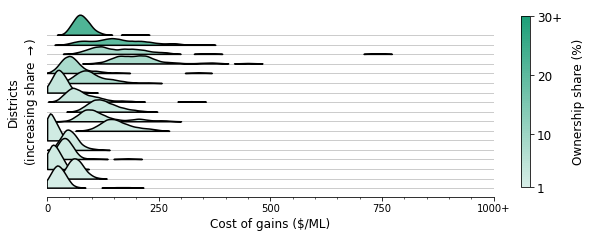

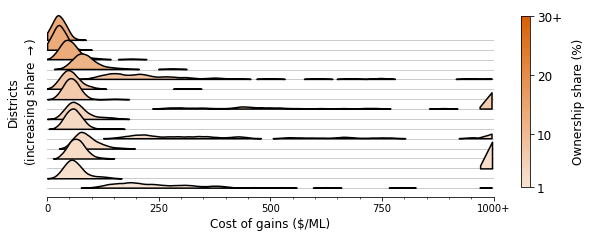

In [31]:
### ridge plot for COG of each partner, using statsmodels triangular kde
fontsize = 12
alpha = 1
bw = 1.0
bw_scalar = 1000/30
for fi, soln_obj in enumerate(soln_objs):
    
    df_overall_wcu, partners, nonpartners, shares = get_wcu_mc_district_results_soln(soln_obj_wcu_mc_dict[soln_obj], soln_obj_wcu_mc_dict['baseline'])

    fig, ax = plt.subplots(1, figsize=(10,3.5))
    ridgesep = 0.1
    xmin = 0
    xmax = 1000

    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        plt.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cog'
        data = df_overall_wcu[c]
        kde_district = sm.nonparametric.KDEUnivariate(data)
        kde_district.fit(kernel='tri', fft=False, bw=bw * bw_scalar)
        x = np.arange(xmin, xmax, 0.1*bw_scalar)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx) * bw_scalar * 0.3
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmaps_brewer[soln_obj](shares[i])
        plt.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=alpha, zorder=2, fc = color, ec = 'k')

    plt.yticks([])
    plt.xticks([0,250,500,750,1000],['0','250','500','750',"1000+"])
    ax.xaxis.set_major_locator(MultipleLocator(250))
    ax.xaxis.set_minor_locator(MultipleLocator(50))

    plt.xlim([xmin, xmax])
    plt.ylabel('Districts\n' + r'(increasing share $\rightarrow$)', fontsize=fontsize)
    plt.xlabel('Cost of gains ($/ML)', fontsize=fontsize)
    ax.spines[['top', 'left', 'right']].set_visible(False)


    ### add colorbar 
    mappable = cm.ScalarMappable(cmap=cmaps_brewer[soln_obj])
    cb = plt.colorbar(mappable, ax=ax, shrink=0.9, ticks=[0.01, 0.1, 0.2, 0.3])
    _ = cb.ax.set_yticklabels(['1','10','20','30+'], fontsize=fontsize)
    _ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
    _ = cb.ax.set_ylim([0.01, 0.3])
    
    plt.savefig(f'{fig_dir}district_pdfs_wcu_{soln_obj}.png', bbox_inches='tight', dpi=300, transparent=True)


['FRS', 'TBA', 'TPD', 'SSJ', 'PRT', 'SFW', 'ARV', 'LWT', 'LDS', 'SAU', 'EXE']
[840.510104999814, 432.77977047248703, 113.97283769174865, 59.668786748694146, 14.933082880385742, 11.383884214086907, 10.68001257972879, -34.4356386735406, -38.818732726771074, -59.29553527181768, -144.68480936114156]


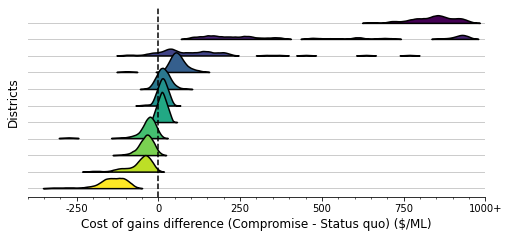

In [32]:
### ridge plot for COG of each partner, difference between friant16 & compromise. WCU.
cmap_vir = cm.get_cmap('viridis')
bw_scalar = 1000/30


### reorder based on cog in friant16 minus in compromise
pricediffs = []
for i,d in enumerate(partners_joint):
    c = f'{d}_cog'
    pricediffs.append((dict_df_overall_wcu[soln_objs[1]][c] - dict_df_overall_wcu[soln_objs[0]][c]).mean())
order = np.argsort(pricediffs)[::-1]
partners_joint = [partners_joint[o] for o in order]
print(partners_joint)
print([pricediffs[o] for o in order])

fig, ax = plt.subplots(1, figsize=(8.2,3.5))
ridgesep = 0.1
xmin = -400
xmax = 1000


for i,d in enumerate(partners_joint):

    ### set bottom of "ridge" in decreasing order (smallest share at bottom)
    bottom = (-i * ridgesep)
    plt.axhline(bottom, color='0.8', zorder=1, lw=1)

    c = f'{d}_cog'
    data = dict_df_overall_wcu[soln_objs[1]][c] - dict_df_overall_wcu[soln_objs[0]][c]

    kde_district = sm.nonparametric.KDEUnivariate(data)
    kde_district.fit(kernel='tri', fft=False, bw=bw * bw_scalar)
    x = np.arange(xmin, xmax, 0.1*bw_scalar)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx) * bw_scalar*0.2
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)

    color = cmap_vir(i/(len(partners_joint)-1))
    plt.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=alpha, zorder=2, fc = color, ec = 'k')

plt.axvline(0, color='k', ls='--')
plt.yticks([])
plt.xticks([-250,0,250,500,750,1000],['-250','0','250','500','750',"1000+"])
ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_minor_locator(MultipleLocator(50))

plt.xlim([xmin, xmax])
plt.ylabel('Districts', fontsize=fontsize)
plt.xlabel('Cost of gains difference (Compromise - Status quo) ($/ML)', fontsize=fontsize)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.savefig(f'{fig_dir}district_pdf_diffs_wcu.png', bbox_inches='tight', dpi=300, transparent=True)


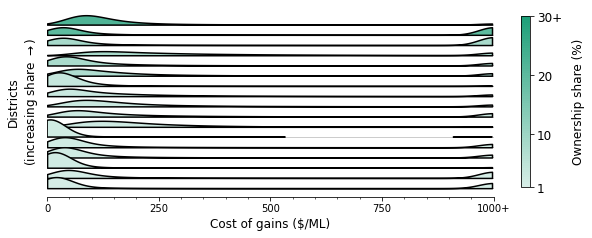

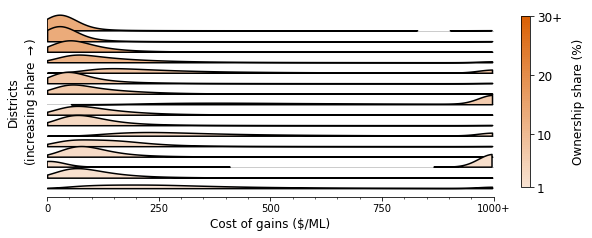

In [33]:
### ridge plot for COG of each partner, DU
fontsize = 12

dict_df_overall_du, dict_partners, dict_nonpartners, dict_shares = {}, {}, {}, {}

for soln_obj in soln_objs:
    dict_df_overall_du[soln_obj], dict_partners[soln_obj], dict_nonpartners[soln_obj], dict_shares[soln_obj] = get_du_mc_district_results_soln(soln_obj_du_mc_dict[soln_obj], soln_obj_du_mc_dict['baseline'])

    
for fi, soln_obj in enumerate(soln_objs):
    
    df_overall_du, partners, nonpartners, shares = dict_df_overall_du[soln_obj], dict_partners[soln_obj], dict_nonpartners[soln_obj], dict_shares[soln_obj]

    fig, ax = plt.subplots(1, figsize=(10,3.5))
    ridgesep = 0.1
    xmin = 0
    xmax = 1000

    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        plt.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cog'
        data = df_overall_du[c]
        kde_district = sm.nonparametric.KDEUnivariate(data)
        kde_district.fit(bw=bw * bw_scalar)
        x = np.arange(xmin, xmax, 0.1*bw_scalar)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx) * bw_scalar * 0.45
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmaps_brewer[soln_obj](shares[i])
        plt.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=alpha, zorder=2, fc = color, ec = 'k')

    plt.yticks([])
    plt.xticks([0,250,500,750,1000],['0','250','500','750',"1000+"])
    ax.xaxis.set_major_locator(MultipleLocator(250))
    ax.xaxis.set_minor_locator(MultipleLocator(50))

    plt.xlim([xmin, xmax])
    plt.ylabel('Districts\n' + r'(increasing share $\rightarrow$)', fontsize=fontsize)
    plt.xlabel('Cost of gains ($/ML)', fontsize=fontsize)
    ax.spines[['top', 'left', 'right']].set_visible(False)


    ### add colorbar 
    mappable = cm.ScalarMappable(cmap=cmaps_brewer[soln_obj])
    cb = plt.colorbar(mappable, ax=ax, shrink=0.9, ticks=[0.01, 0.1, 0.2, 0.3])
    _ = cb.ax.set_yticklabels(['1','10','20','30+'], fontsize=fontsize)
    _ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
    _ = cb.ax.set_ylim([0.01, 0.3])
    
    plt.savefig(f'{fig_dir}district_pdfs_du_{soln_obj}.png', bbox_inches='tight', dpi=300, transparent=True)
    

['FRS', 'TPD', 'TBA', 'ARV', 'SFW', 'LDS', 'SSJ', 'PRT', 'LWT', 'SAU', 'EXE']
[222.36286370862726, 119.04202626299873, 61.751111417141225, -12.81420787322808, -91.7552441055509, -107.79786872803163, -108.88993581201534, -124.38363458102621, -180.4072102187931, -205.8438340481368, -256.4271332248203]


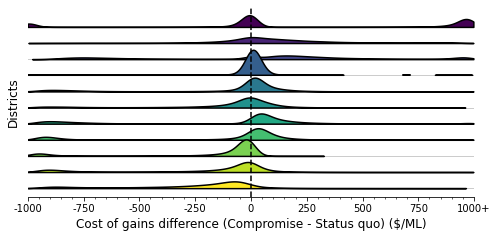

In [34]:
### ridge plot for COG of each partner, difference between friant16 & compromise. DU.
cmap_vir = cm.get_cmap('viridis')
bw_scalar = 1000/30

### get overlapping districts included in each
partners_joint = [d for d in dict_partners['soln375'] if d in dict_partners['friant16']]

### reorder based on cog in friant16 minus in compromise
pricediffs = []
for i,d in enumerate(partners_joint):
    c = f'{d}_cog'
    pricediffs.append((dict_df_overall_du[soln_objs[1]][c] - dict_df_overall_du[soln_objs[0]][c]).mean())
order = np.argsort(pricediffs)[::-1]
partners_joint = [partners_joint[o] for o in order]
print(partners_joint)
print([pricediffs[o] for o in order])

fig, ax = plt.subplots(1, figsize=(8,3.5))
ridgesep = 0.1
xmin = -1000
xmax = 1000

for i,d in enumerate(partners_joint):

    ### set bottom of "ridge" in decreasing order (smallest share at bottom)
    bottom = (-i * ridgesep)
    plt.axhline(bottom, color='0.8', zorder=1, lw=1)

    c = f'{d}_cog'
    data = dict_df_overall_du[soln_objs[1]][c] - dict_df_overall_du[soln_objs[0]][c]
    kde_district = sm.nonparametric.KDEUnivariate(data)
    kde_district.fit(bw=bw * bw_scalar)
    x = np.arange(xmin, xmax, 0.1*bw_scalar)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx) * bw_scalar*0.45
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)

    color = cmap_vir(i/(len(partners_joint)-1))
    plt.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=alpha, zorder=2, fc = color, ec = 'k')

plt.axvline(0, color='k', ls='--')
plt.yticks([])
ax.xaxis.set_major_locator(MultipleLocator(250))
ax.xaxis.set_minor_locator(MultipleLocator(50))

plt.xlim([xmin, xmax])
plt.xticks([-1000,-750,-500,-250,0,250,500,750,1000],['-1000','-750','-500','-250','0','250','500','750',"1000+"])
plt.ylabel('Districts', fontsize=fontsize)
plt.xlabel('Cost of gains difference (Compromise - Status quo) ($/ML)', fontsize=fontsize)
ax.spines[['top', 'left', 'right']].set_visible(False)


plt.savefig(f'{fig_dir}district_pdf_diffs_du.png', bbox_inches='tight', dpi=300, transparent=True)


In [35]:
dict_df_overall_du['soln375'].shape[0]

107520